In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

### Stations where I calculated $N^2$

Script **`get_N2.py`**, calculates $N^2$ everyday at the following stations and saves the whole profile in a csv file using pandas. I ran it for all experiments with a canyon. There are two peaks in the calculation, one below 150 m and the other one around 250 m. These are where the vertical resolution changes and when I calculated the derivative $d\rho/dz$ I got these spikes.

In [3]:
# Set necessary grid variables and grid file
grid = xr.open_dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
rc = grid.RC

# station locations
ys = [262,220,262,227,245,245,262,220,100]
xs = [60,60,180,180,160,200,300,300,180]

station_names = ['UpSh','UpSl','CH','CM','UpC','DnC','DnSh','DnSl','CO']

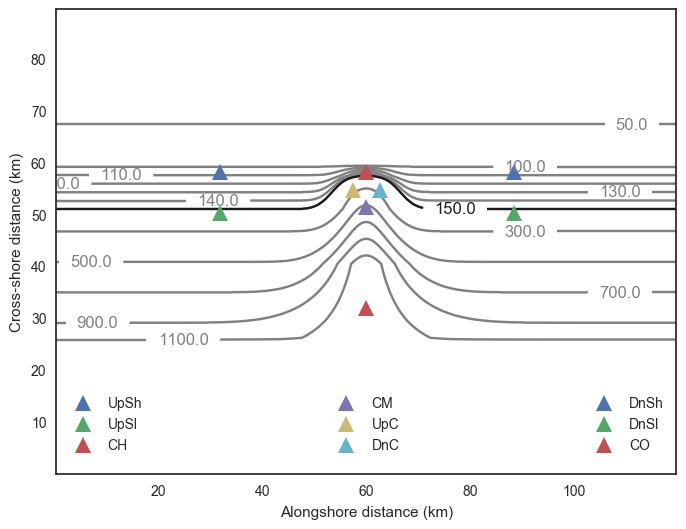

In [4]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

cntr = ax.contour(grid.X/1000,grid.Y/1000,grid.Depth,
                  [50,100,110,120,130,140,150,300,500,700,900,1100],
                  colors=['0.5','0.5','0.5','0.5','0.5','0.5','0.1','0.5','0.5','0.5','0.5','0.5','0.5'])
ax.clabel(cntr,fmt='%0.1f')

sns.set_palette('Paired',9)
for x,y,stn_name in zip(xs,ys,station_names):
    ax.plot(grid.X[x]/1000,grid.Y[y]/1000,'^',markersize=12,label=stn_name)

ax.legend(bbox_to_anchor=(0., 0.02, 1., .102), loc=8,ncol=3, mode="expand")
ax.set_xlabel('Alongshore distance (km)')
ax.set_ylabel('Cross-shore distance (km)')

<xarray.DataArray 'Z' ()>
array(-112.5)
Coordinates:
    Z        float64 -112.5
Attributes:
    long_name: vertical coordinate of cell center
    units: meters
    positive: up


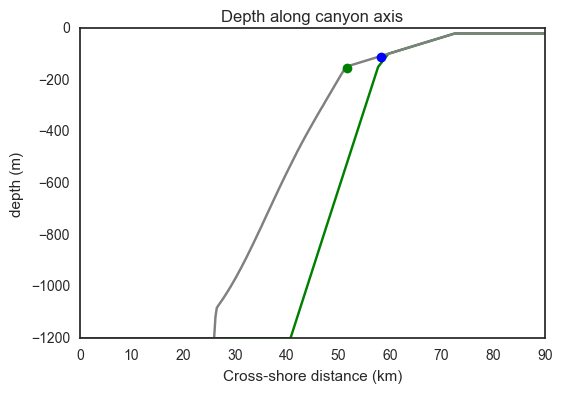

In [5]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(grid.YC[:,180]/1000,-grid.Depth[:,180],'g-')
ax.plot(grid.YC[:,100]/1000,-grid.Depth[:,100],'-',color='grey')
ax.plot(grid.YC[227,100]/1000,grid.Z[30],'go')  
ax.plot(grid.YC[262,100]/1000,grid.Z[22],'bo')  
ax.set_title('Depth along canyon axis')
ax.set_ylabel('depth (m)')
ax.set_xlabel('Cross-shore distance (km)')

print(grid.Z[22])

In [6]:
def plotN_profile(ax,st,expNames,col_pal,key,key0):
    
    sns.set_palette(col_pal)
    
    for runs in expNames:
        
        filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,st))
        df = pd.read_csv(filename1)
        df_anom=df.sub(df[key0].squeeze(),axis=0)
        
        ax.plot(df_anom[key],rc[1:-1],label=runs)
        ax.plot(df_anom[key0],rc[1:-1],'--',color='grey',label='')
        ax.axhline(rc[30],linestyle='--',color='0.6')
        ax.axhline(rc[27],linestyle='--',color='0.6')
        ax.set_title('%s,%s' %(key, st))
        ax.set_xlabel('$N-N_0$ ($s^{-1}$)')
        ax.set_ylabel('depth (m)')


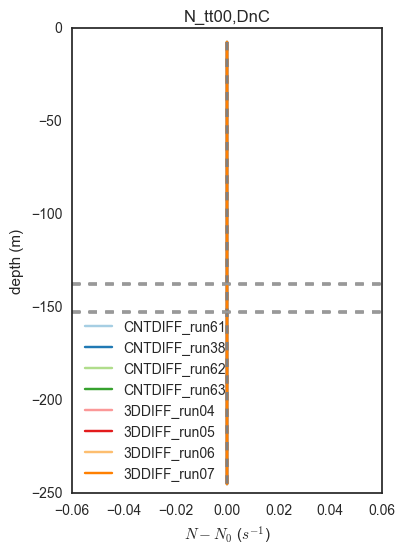

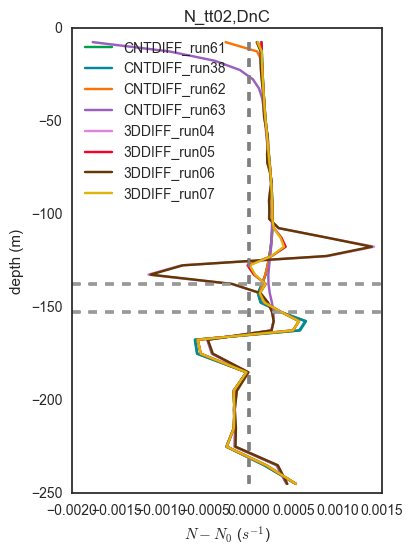

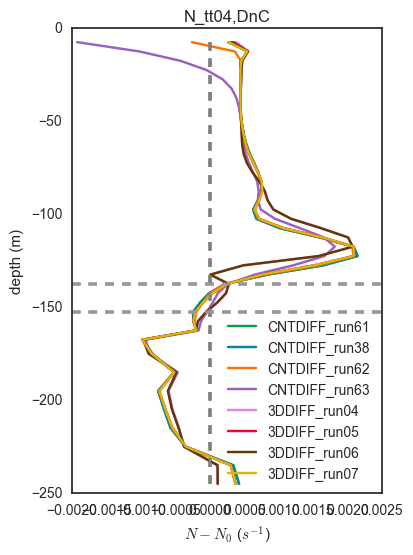

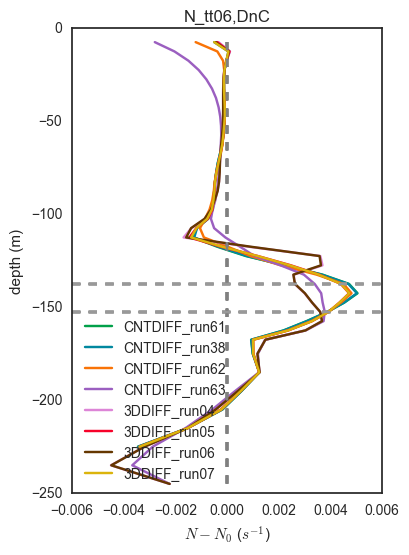

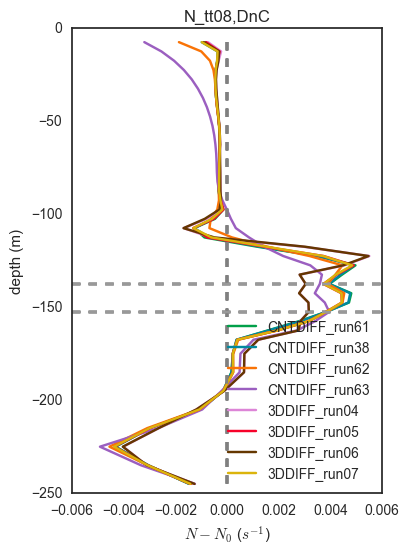

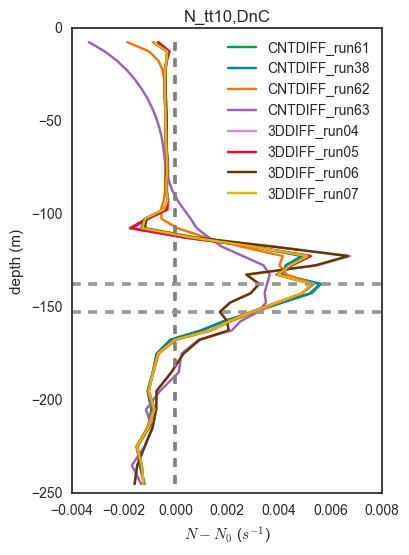

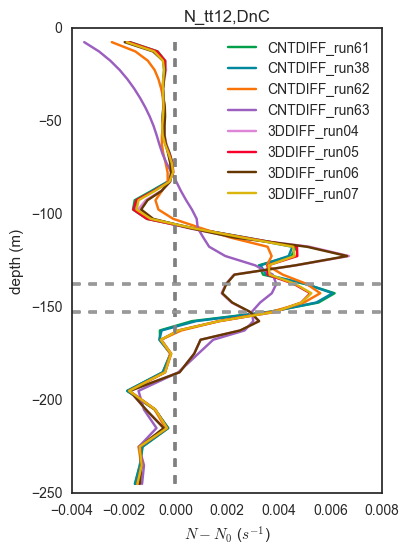

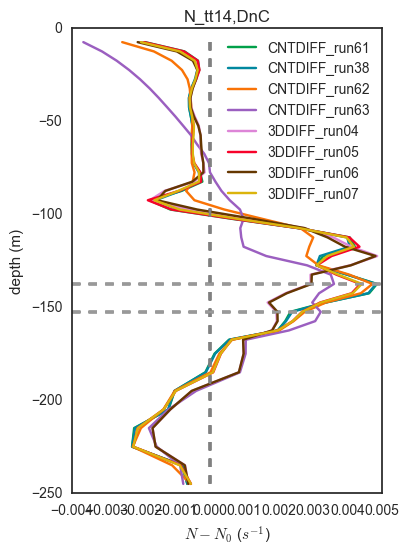

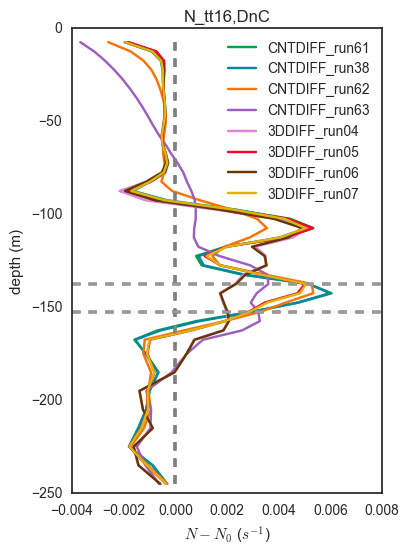

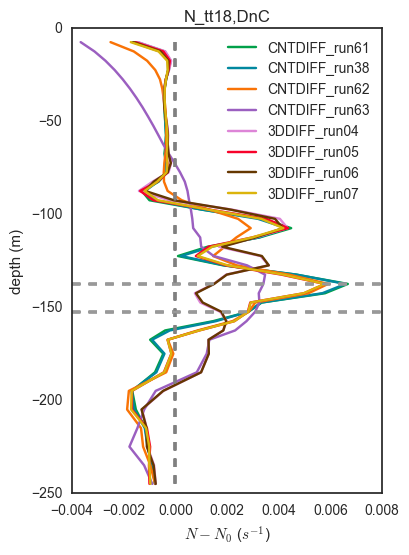

In [7]:
expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']


colours = ["emerald",#
          "teal blue",# 
          "orange",# 
          "amethyst",# 
          "lavender pink",
          "cherry red",
          "brown",
          "gold"]# 

colour_pal = sns.xkcd_palette(colours)

stname = 'DnC'
keys = ['N_tt00','N_tt02','N_tt04','N_tt06','N_tt08','N_tt10','N_tt12','N_tt14','N_tt16','N_tt18']

for key in keys:
    fig,ax = plt.subplots(1,1,figsize=(4,6))
    figHand = plotN_profile(ax,stname,expNames,colour_pal,key,'N_tt00')
    #figName = ('results/figures/BuoyancyFrequency/N_%s.png' %stname)
    #figHand.savefig(figName,format='png')
    
    ax.legend(loc=0)   
    plt.show()

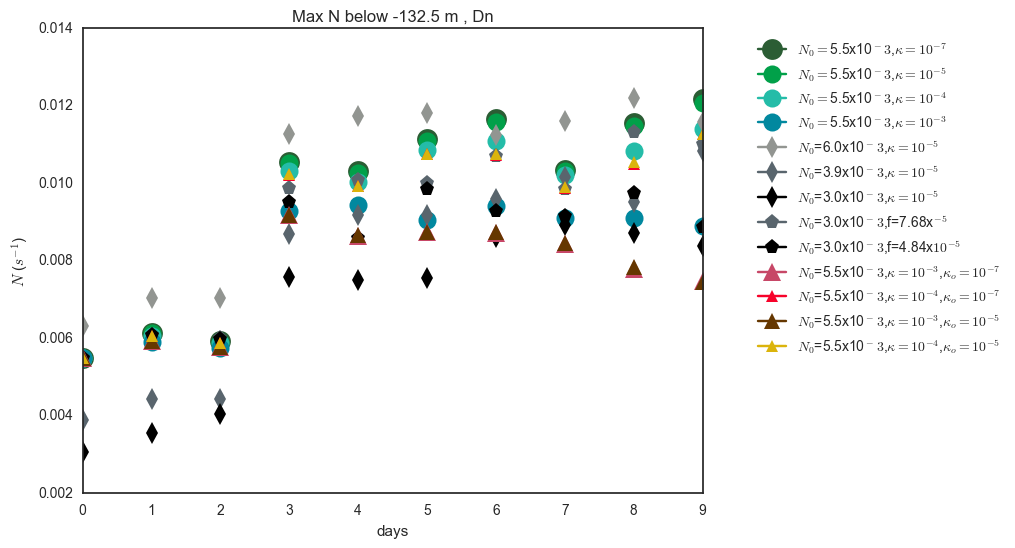

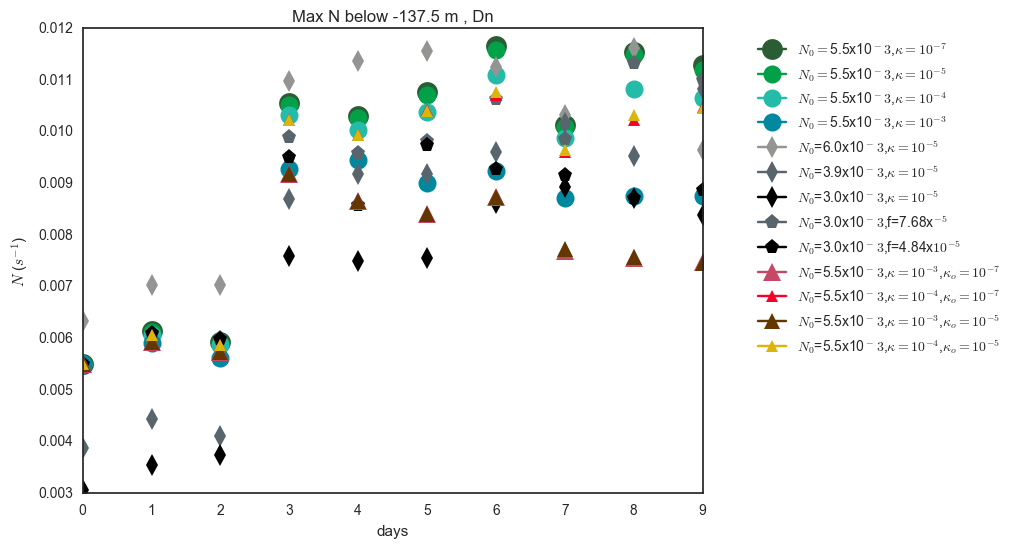

In [9]:
# Plot specifications per experiment

keys = ['N_tt00','N_tt02','N_tt04','N_tt06','N_tt08','N_tt10','N_tt12','N_tt14','N_tt16','N_tt18']
key0 = 'N_tt00'

markersizes = [15,13,13,13,11,11,11,11,11,13,9,11,9]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','^','^','^','^']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run44',
           'CNTDIFF_run46',
           'CNTDIFF_run51',
           'CNTDIFF_run52',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.0x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=3.9x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=3.0x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=3.0x10$^-3$,f=7.68x$^{-5}$',
              '$N_0$=3.0x10$^-3$,f=4.84x$10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "grey",
           "slate grey",
           "black",
           "slate grey",
           "black",
          "deep rose",
          "cherry red",
          "brown",
          "gold"]# 

# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
times = range(10)
for runs,col,ms,mm in zip(expNames,colours,markersizes,markerstyle):
    
    for key,tt in zip(keys,times):
        
        filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
        df = pd.read_csv(filename1)
        df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
            
        plt1, = ax.plot(tt,max(df_anom[key][26:]),marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
        
        ax.set_title('Max N below %1.1f m , Dn' %rc[26])
        ax.set_ylabel('$N$ ($s^{-1}$)')
        ax.set_xlabel('days')

    labels.append(plt1)
    
    
    ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()

fig,ax = plt.subplots(1,1,figsize=(8,6))

for runs,col,ms,mm in zip(expNames,colours,markersizes,markerstyle):
    
    for key,tt in zip(keys,times):
        
        filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
        df = pd.read_csv(filename1)
        df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
            
        plt1, = ax.plot(tt,max(df_anom[key][27:]),marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
        
        ax.set_title('Max N below %1.1f m , Dn' %rc[27])
        ax.set_ylabel('$N$ ($s^{-1}$)')
        ax.set_xlabel('days')

    labels.append(plt1)
    
    
    ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()

In [17]:
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

expNames = ['CNTDIFF_run38',
           'CNTDIFF_run45',
           'CNTDIFF_run44',
           'CNTDIFF_run46',
          # 'CNTDIFF_run51',
          # 'CNTDIFF_run52']
            ]

maxN = np.empty(len(expNames))
stdN = np.empty(len(expNames))
ii=0  
for runs in expNames:
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    maxN[ii] = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdN[ii] = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    ii=ii+1

L = 6400.0
U = 0.36
R = 5000.0

No = np.array([5.5E-3,6E-3,3.9E-3,3E-3])#,5.5E-3,5.5E-3])
f = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5])#,7.68E-5,4.84E-5])
Dh = f*L/(No)
Z =  (1.4*U*(L**(1/2)))/(No*(R**(1/2)))/2

func = np.polyfit(No*Dh/Z, maxN, 1)
LinFit = np.poly1d(func)

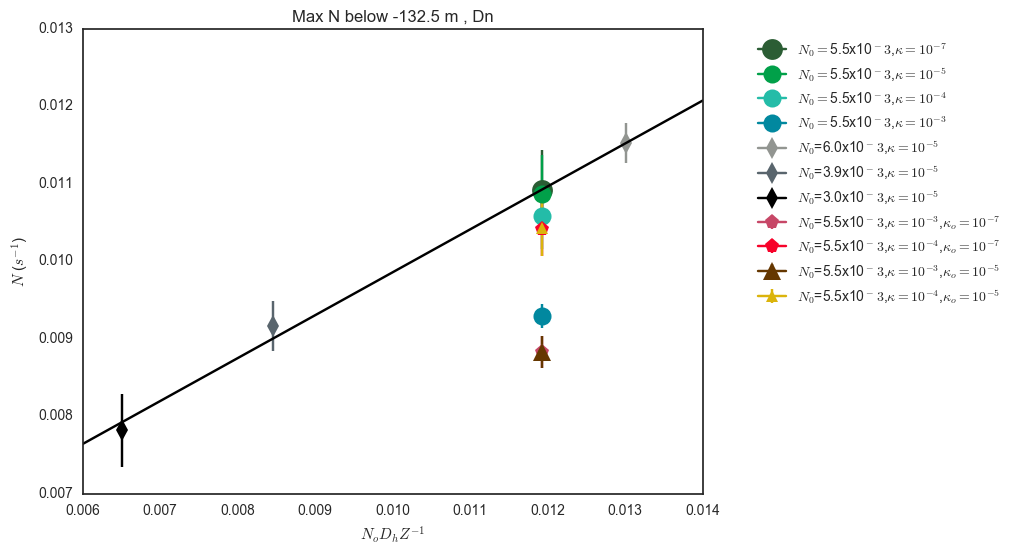

In [18]:
# Plot specifications per experiment
keys = ['N_tt06','N_tt08','N_tt10','N_tt12']
key0 = 'N_tt00'

markersizes = [15,13,13,13,11,11,11,11,11,13,9,11,9]
markerstyle = ['o','o','o','o','d',"d","d",'p','p','^','^','^','^']

expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run44',
           'CNTDIFF_run46',
           #'CNTDIFF_run51',
           #'CNTDIFF_run52',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.0x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=3.9x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=3.0x10$^-3$,$\kappa=10^{-5}$',
             #'$N_0$=3.0x10$^-3$,f=7.68x$10^{-5}$',
             # '$N_0$=3.0x10$^-3$,f=4.84x$10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
             ]

colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "grey",
           "slate grey",
           "black",
           #"slate grey",
           #"black",
          "deep rose",
          "cherry red",
          "brown",
          "gold"]# 


# Constants and scales
L = 6400.0
U = 0.36
R = 5000.0
g=9.81

Nos = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,6E-3,3.9E-3,3E-3,#5.5E-3,5.5E-3,
                5.5E-3,5.5E-3,5.5E-3,5.5E-3])
fs = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,#7.68E-5,4.84E-5,
               9.66E-5,9.66E-5,9.66E-5,9.66E-5,])
Dhs = fs*L/(Nos)
Zs =  (1.4*U*(L**(1/2)))/(Nos*(R**(1/2)))/2

# Plot
fig,ax = plt.subplots(1,1,figsize=(8,6))
labels=[]
stname = 'DnC'
x_fit = np.linspace(0.006, 0.014, 50)

for runs,col,ms,mm,Dh,Z,No in zip(expNames,colours,markersizes,markerstyle,Dhs,Zs,Nos):
    
    filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])        
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    
    meanMax = np.mean(np.array([maxd3,maxd4,maxd5,maxd6]))
    stdMax = np.std(np.array([maxd3,maxd4,maxd5,maxd6]))
    
    plt1 = ax.errorbar(No*Dh/Z,meanMax,yerr=stdMax,marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
   
    ax.set_title('Max N below %1.1f m , Dn' %rc[26])
    ax.set_ylabel('$N$ ($s^{-1}$)')
    ax.set_xlabel('$N_o D_hZ^{-1}$')

    labels.append(plt1)
    
plt2 = ax.plot(x_fit,LinFit(x_fit),'-k')
           
ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()



## Upstream shelf

In [ ]:
expNames = ['CNTDIFF_run61',
           'CNTDIFF_run38',
           'CNTDIFF_run62',
           'CNTDIFF_run63',
           'CNTDIFF_run45',
           'CNTDIFF_run44',
           'CNTDIFF_run46',
           '3DDIFF_run04',
           '3DDIFF_run05',
           '3DDIFF_run06',
           '3DDIFF_run07']
         

exp_labels = ['$N_0=$5.5x10$^-3$,$\kappa=10^{-7}$',
              '$N_0=$5.5x10$^-3$,$\kappa=10^{-5}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-4}$',
             '$N_0=$5.5x10$^-3$,$\kappa=10^{-3}$',
             '$N_0$=6.0x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=3.9x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=3.0x10$^-3$,$\kappa=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-7}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-3}$,$\kappa_o=10^{-5}$',
             '$N_0$=5.5x10$^-3$,$\kappa=10^{-4}$,$\kappa_o=10^{-5}$',
             ]


colours = ["pine",
           "emerald",#
          "tealish",
          "teal blue",# 
           "grey",
          "slate grey",
            "black",
          "deep rose",
          "cherry red",
          "brown",
          "gold"]# 

colour_pal = sns.xkcd_palette(colours)
labels=[]
stname = 'UpSh'
keys = ['N_tt00','N_tt02','N_tt04','N_tt06','N_tt08','N_tt10','N_tt12','N_tt14','N_tt16','N_tt18']
key0 = 'N_tt00'
fig,ax = plt.subplots(1,1,figsize=(8,6))

markersizes = [15,13,13,13,11,11,11,13,9,11,9]
markerstyle = ['o','o','o','o','d',"d","d",'^','^','^','^']

times=range(10)

for runs,col,ms,mm in zip(expNames,colours,markersizes,markerstyle):
    
    for key,tt in zip(keys,times):
        
        filename1 = ('../results/metricsDataFrames/N_%s_%s.csv' % (runs,stname))
        df = pd.read_csv(filename1)
        df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
            
        plt1, = ax.plot(tt,max(df_anom[key]),marker=mm,markersize=ms,color=sns.xkcd_rgb[col])
        
        ax.set_title('Max N , UpSh')
        ax.set_ylabel('$N$ ($s^{-1}$)')
        ax.set_xlabel('days')

    labels.append(plt1)
    
    
    ax.legend(labels,exp_labels,bbox_to_anchor=(1.5,1))
    

plt.show()